In [1]:
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [2]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 650000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 50000
    })
})


In [3]:
# Print the first example in the dataset
print(dataset["train"][0])

{'label': 4, 'text': "dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."}


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

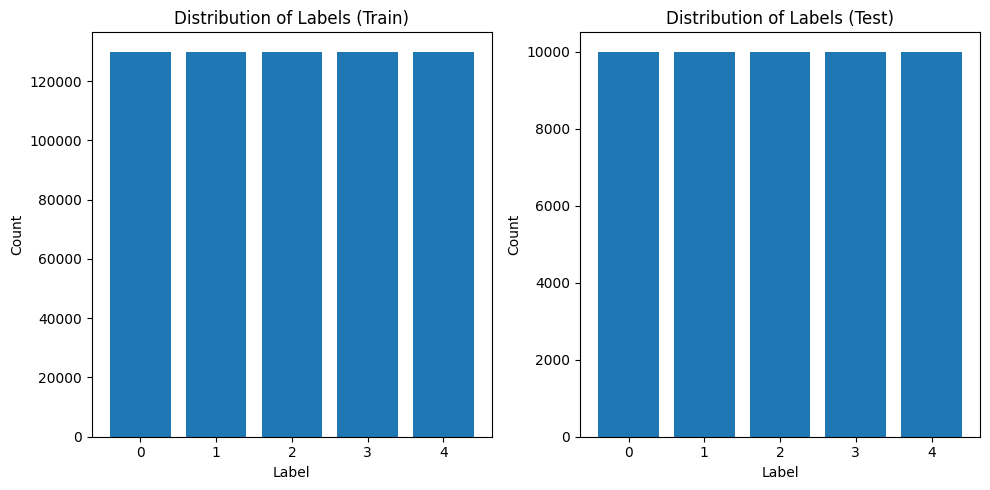

In [5]:
# Convert the train dataset to a pandas DataFrame
train_df = pd.DataFrame(dataset["train"])

# Convert the test dataset to a pandas DataFrame
test_df = pd.DataFrame(dataset["test"])

# Count the occurrences of each label in the train dataset
train_label_counts = train_df["label"].value_counts()

# Count the occurrences of each label in the test dataset
test_label_counts = test_df["label"].value_counts()

# Create subplots for train and test datasets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the distribution of labels for train dataset
ax1.bar(train_label_counts.index, train_label_counts.values)
ax1.set_xlabel("Label")
ax1.set_ylabel("Count")
ax1.set_title("Distribution of Labels (Train)")

# Plot the distribution of labels for test dataset
ax2.bar(test_label_counts.index, test_label_counts.values)
ax2.set_xlabel("Label")
ax2.set_ylabel("Count")
ax2.set_title("Distribution of Labels (Test)")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


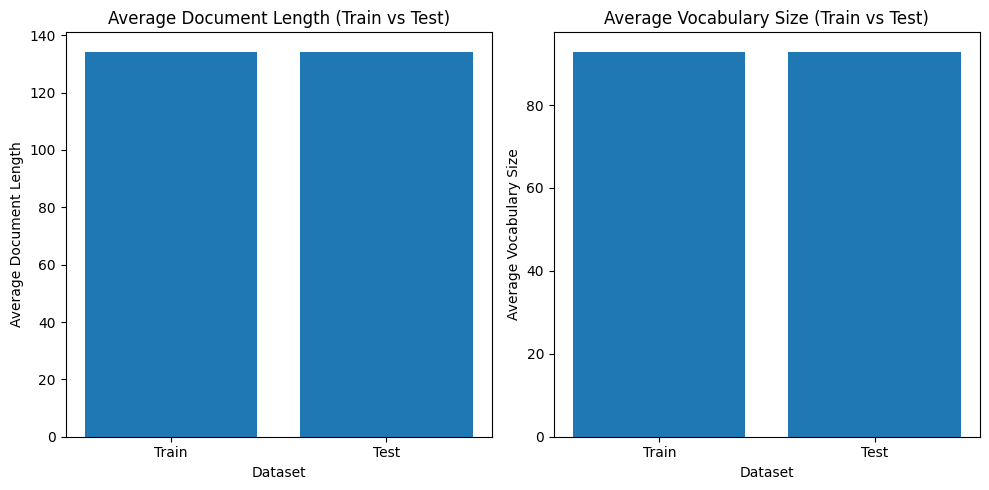

In [6]:
# Calculate the document length for each document
train_df['doc_length'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['doc_length'] = test_df['text'].apply(lambda x: len(x.split()))

# Calculate the average document length
avg_doc_length_train = train_df['doc_length'].mean()
avg_doc_length_test = test_df['doc_length'].mean()

# Calculate the vocabulary size for each document
train_df['vocab_size'] = train_df['text'].apply(lambda x: len(set(x.split())))
test_df['vocab_size'] = test_df['text'].apply(lambda x: len(set(x.split())))

# Calculate the average vocabulary size
avg_vocab_size_train = train_df['vocab_size'].mean()
avg_vocab_size_test = test_df['vocab_size'].mean()

# Create subplots for average document length and average vocabulary size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the average document length
ax1.bar(['Train', 'Test'], [avg_doc_length_train, avg_doc_length_test])
ax1.set_xlabel("Dataset")
ax1.set_ylabel("Average Document Length")
ax1.set_title("Average Document Length (Train vs Test)")

# Plot the average vocabulary size
ax2.bar(['Train', 'Test'], [avg_vocab_size_train, avg_vocab_size_test])
ax2.set_xlabel("Dataset")
ax2.set_ylabel("Average Vocabulary Size")
ax2.set_title("Average Vocabulary Size (Train vs Test)")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [7]:
print(train_df.describe())
print(test_df.describe())

               label     doc_length     vocab_size
count  650000.000000  650000.000000  650000.000000
mean        2.000000     134.098089      92.712128
std         1.414215     121.396115      67.647099
min         0.000000       1.000000       1.000000
25%         1.000000      52.000000      44.000000
50%         2.000000      99.000000      76.000000
75%         3.000000     175.000000     123.000000
max         4.000000    1052.000000     564.000000
              label    doc_length    vocab_size
count  50000.000000  50000.000000  50000.000000
mean       2.000000    134.290980     92.885480
std        1.414228    121.246345     67.659939
min        0.000000      1.000000      1.000000
25%        1.000000     53.000000     45.000000
50%        2.000000     99.000000     77.000000
75%        3.000000    176.000000    123.000000
max        4.000000   1009.000000    512.000000


In [8]:
# Reduce the size of the train and test datasets
train_df_sample = train_df.sample(n=65000, random_state=1)
test_df_sample = test_df.sample(n=5000, random_state=1)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

# Convert the text into numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_df_sample['text'])

# Use K-means to cluster the documents
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Add the cluster labels to the dataframe
train_df_sample['cluster'] = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Use TruncatedSVD to reduce the dimensionality of the data to 2D
svd = TruncatedSVD(n_components=2, random_state=0)
principalComponents = svd.fit_transform(X)

# Create a DataFrame with the two principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

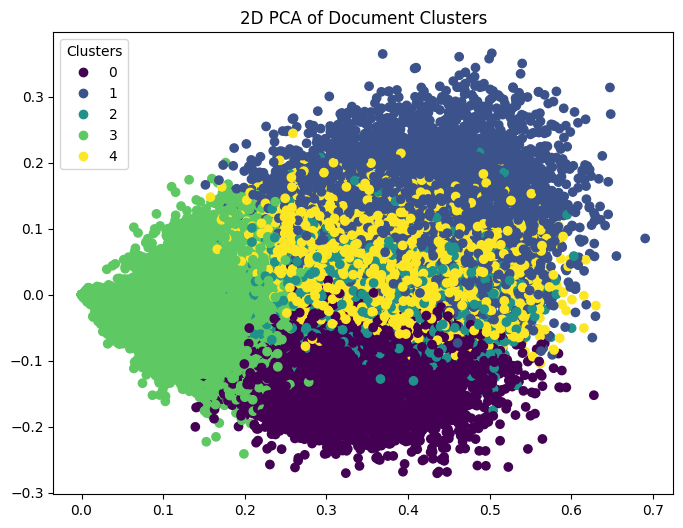

done


In [12]:
# Visualize the clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=train_df_sample['cluster'])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('2D PCA of Document Clusters')
plt.show()
print('done')

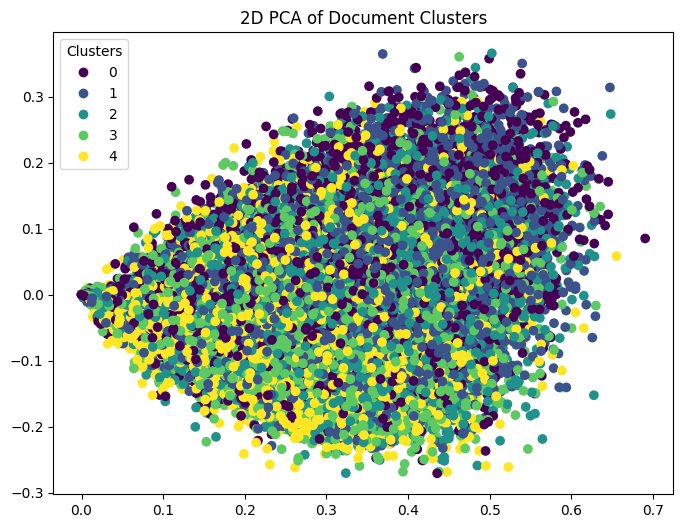

done


In [14]:
# Visualize the clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=train_df_sample['label'])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('2D PCA of Document Clusters')
plt.show()
print('done')

In [18]:
train_df_sample.iloc[0]['text']

'Thank you for all the emails you sent me on my review! I was surprised at how many responses I recieved from people searching for the right dentist..\\nI shared my new dentist information and even got some movie tickets from my dentist for the referrals!\\nI find it funny how since I wrote this review how many people have reviewed with 5 stars... They must have a lot of friends and family! \\nI hope everyone reads my review and picks the right dentist for your needs!\\nHappy Holidays'

In [19]:
train_df_sample

,label,text,doc_length,vocab_size,cluster
21194,0,Thank you for all the emails you sent me on my...,86,62,3
373117,3,"I, myself, and vietnamese and have tried all d...",129,90,0
470627,2,"3.5 stars.\n\nI have had BFG on my list of \""m...",140,102,4
256672,2,Edamame with truffle salt was great; really li...,27,26,3
465495,3,So I'm running errands before I go back to th...,129,84,4
...,...,...,...,...,...
344887,4,I love this place and their excellent steaks...,8,8,3
580827,3,Been there twice. Great food but buy the wine ...,12,11,3
485230,0,I bought an amazing TaylorMade golf bag for so...,349,217,2
550667,4,Holy crud was this place AMAZING!!!!!! It came...,77,62,1


In [20]:
(train_df_sample['label'] == train_df_sample['cluster']).sum()

10575

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Use t-SNE to reduce the dimensionality of the data to 3D
tsne = TSNE(n_components=3, random_state=0)
principalComponents = tsne.fit_transform(X.toarray())

# Create a DataFrame with the three principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# Visualize the clusters in 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'], c=train_df_sample['label'])

plt.title('3D t-SNE of Document Clusters')
plt.show()